In [53]:
import pandas as pd
import numpy as np
import matplotlib.cm as cmp
import matplotlib.colors as cl
import matplotlib.pyplot as plt
import warnings
import squarify
from jupyterthemes import jtplot
jtplot.style(theme='gruvboxl', grid=False)
warnings.filterwarnings('ignore')

In [2]:
olympics = pd.read_csv('./Olympics-Dataset.csv')

In [3]:
olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
# top 10 most represented teams
top10 = olympics['Team'].value_counts()[:10].to_frame()

In [5]:
top10 

,Team
United States,17847
France,11988
Great Britain,11404
Italy,10260
Germany,9326
Canada,9279
Japan,8289
Sweden,8052
Australia,7513
Hungary,6547


In [6]:
olympics_transf = olympics[olympics['Team'].map(olympics['Team'].value_counts()) > 10000]

In [7]:
ages = olympics_transf.groupby(['Team', 'Games']).mean()['Age'].to_frame()

In [8]:
ages[ages['Age'].isnull()].index.tolist()

[('France', '1904 Summer'), ('Italy', '1896 Summer')]

In [9]:
ages = ages['Age'].fillna(0)

In [10]:
ages.isna().sum()

0

In [11]:
ages = ages.to_frame()

In [12]:
trimmed_ages = ages.query('index.get_level_values("Games") == "1896 Summer" | index.get_level_values("Games") == "1956 Summer" | index.get_level_values("Games") == "2012 Summer"')

In [13]:
trimmed_ages

Age
Team          Games                 
France        1896 Summer  19.789474
              1956 Summer  26.768041
              2012 Summer  26.606635
Great Britain 1896 Summer  26.823529
              1956 Summer  26.514706
              2012 Summer  25.922619
Italy         1896 Summer   0.000000
              1956 Summer  24.548387
              2012 Summer  27.098930
United States 1896 Summer  23.074074
              1956 Summer  24.589327
              2012 Summer  26.461883

In [14]:
trimmed_ages.loc['France']['Age'].reset_index(drop=True)

0    19.789474
1    26.768041
2    26.606635
Name: Age, dtype: float64

In [15]:
age_values = []
for team in trimmed_ages.index.get_level_values('Team').unique():
    team_age = trimmed_ages.loc[team]['Age'].reset_index(drop=True)
    age_values.append(team_age)

In [16]:
age_values = np.array(age_values)

In [17]:
age_values[0]

array([19.78947368, 26.76804124, 26.60663507])

In [18]:
age_values

array([[19.78947368, 26.76804124, 26.60663507],
       [26.82352941, 26.51470588, 25.92261905],
       [ 0.        , 24.5483871 , 27.09893048],
       [23.07407407, 24.58932715, 26.46188341]])

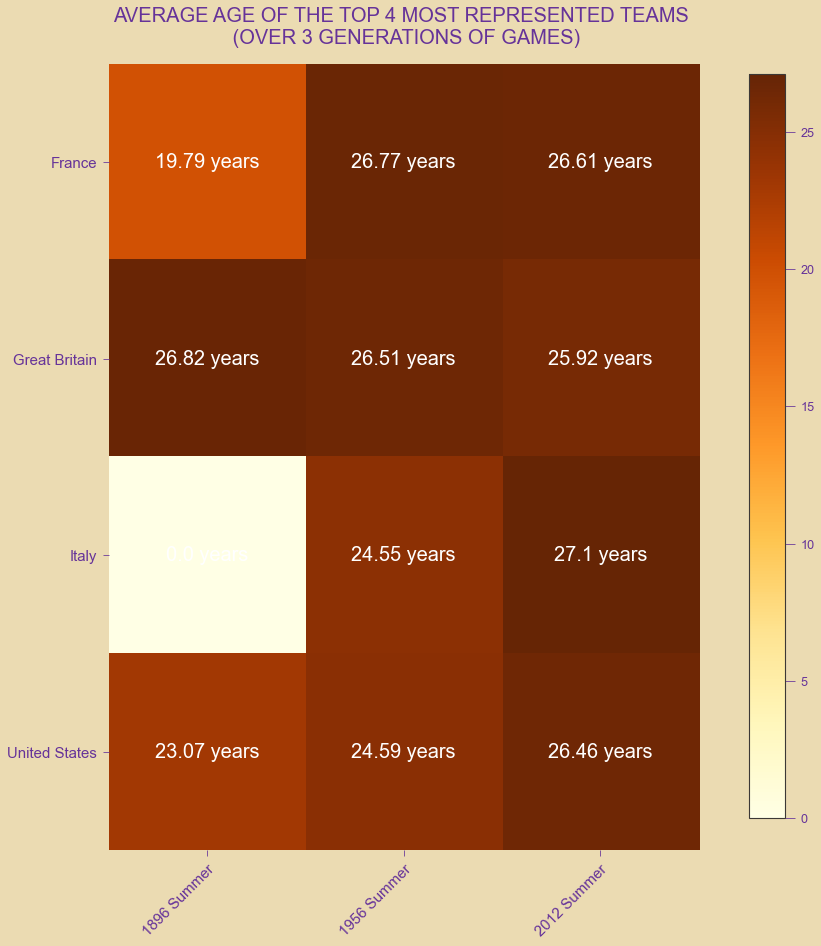

In [70]:
cmap_ages = cmp.get_cmap('YlOrBr')
fig, ax = plt.subplots(figsize=(10,60))
im = ax.imshow(age_values, cmap = cmap_ages)

ax.set_xticks(np.arange(len(trimmed_ages.index.get_level_values('Games').unique())))
ax.set_yticks(np.arange(len(trimmed_ages.index.get_level_values('Team').unique())))
ax.set_xticklabels(trimmed_ages.index.get_level_values('Games').unique())
ax.set_yticklabels(trimmed_ages.index.get_level_values('Team').unique())
ax.tick_params(axis='x', colors="rebeccapurple", size=6)
ax.tick_params(axis='y', colors="rebeccapurple", size=6)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title("AVERAGE AGE OF THE TOP 4 MOST REPRESENTED TEAMS \n (OVER 3 GENERATIONS OF GAMES)", 
          fontsize=20, 
          color= 'rebeccapurple', 
          pad=20,
          loc="center")

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

cax = fig.add_axes([ax.get_position().x1+0.15, ax.get_position().y0, 0.05, ax.get_position().height])
fig.colorbar(im, orientation="vertical", shrink=.96, cax=cax)

cax.tick_params(axis='x', colors="rebeccapurple", size=10)
cax.tick_params(axis='y', colors="rebeccapurple", size=10)


for i in range(len(trimmed_ages.index.get_level_values('Team').unique())):
    for j in range(len(trimmed_ages.index.get_level_values('Games').unique())):
        text = ax.text(j, i, f'{np.round(age_values[i, j], 2)} years', ha="center", va="center", color="w", fontsize=20)
fig.tight_layout()
plt.show()

In [20]:
canada_medals = olympics.query('Team == "Canada" & ~Medal.isnull()')
len(canada_medals)

1243

In [22]:
canada_medals_winter = canada_medals[canada_medals['Games'].astype(str).str.contains("Winter")]
canada_medals_summer = canada_medals[canada_medals['Games'].astype(str).str.contains("Summer")]
print("summer:", len(canada_medals_summer), "\nwinter:", len(canada_medals_winter))

summer: 668 
winter: 575


In [23]:
canada_medal_count = canada_medals.groupby(['Games', 'Year']).count()['Medal'].to_frame()

In [25]:
canada_medal_count = canada_medal_count.sort_values(by=['Medal'], ascending=False)[:34]

In [26]:
medal_count_arr = np.array(canada_medal_count['Medal'], dtype='uint8')
medal_count_arr = np.expand_dims(medal_count_arr, axis=0)

In [27]:
type(canada_medal_count['Medal'][0])

numpy.int64

In [28]:
canada_medal_count = canada_medal_count.reset_index(level=['Year'])

In [32]:
len(canada_medal_count)

34

In [33]:
games_index = canada_medal_count.index.values

In [34]:
pd.Series(canada_medal_count.loc[canada_medal_count['Year'] == 1932].index.values)

0    1932 Summer
1    1932 Winter
dtype: object

In [35]:
num_indices = []
for i in range(len(canada_medal_count)):
    num_indices.append(i)
vals = pd.Index(num_indices)

In [36]:
canada_medal_count = canada_medal_count.set_index([vals, games_index])

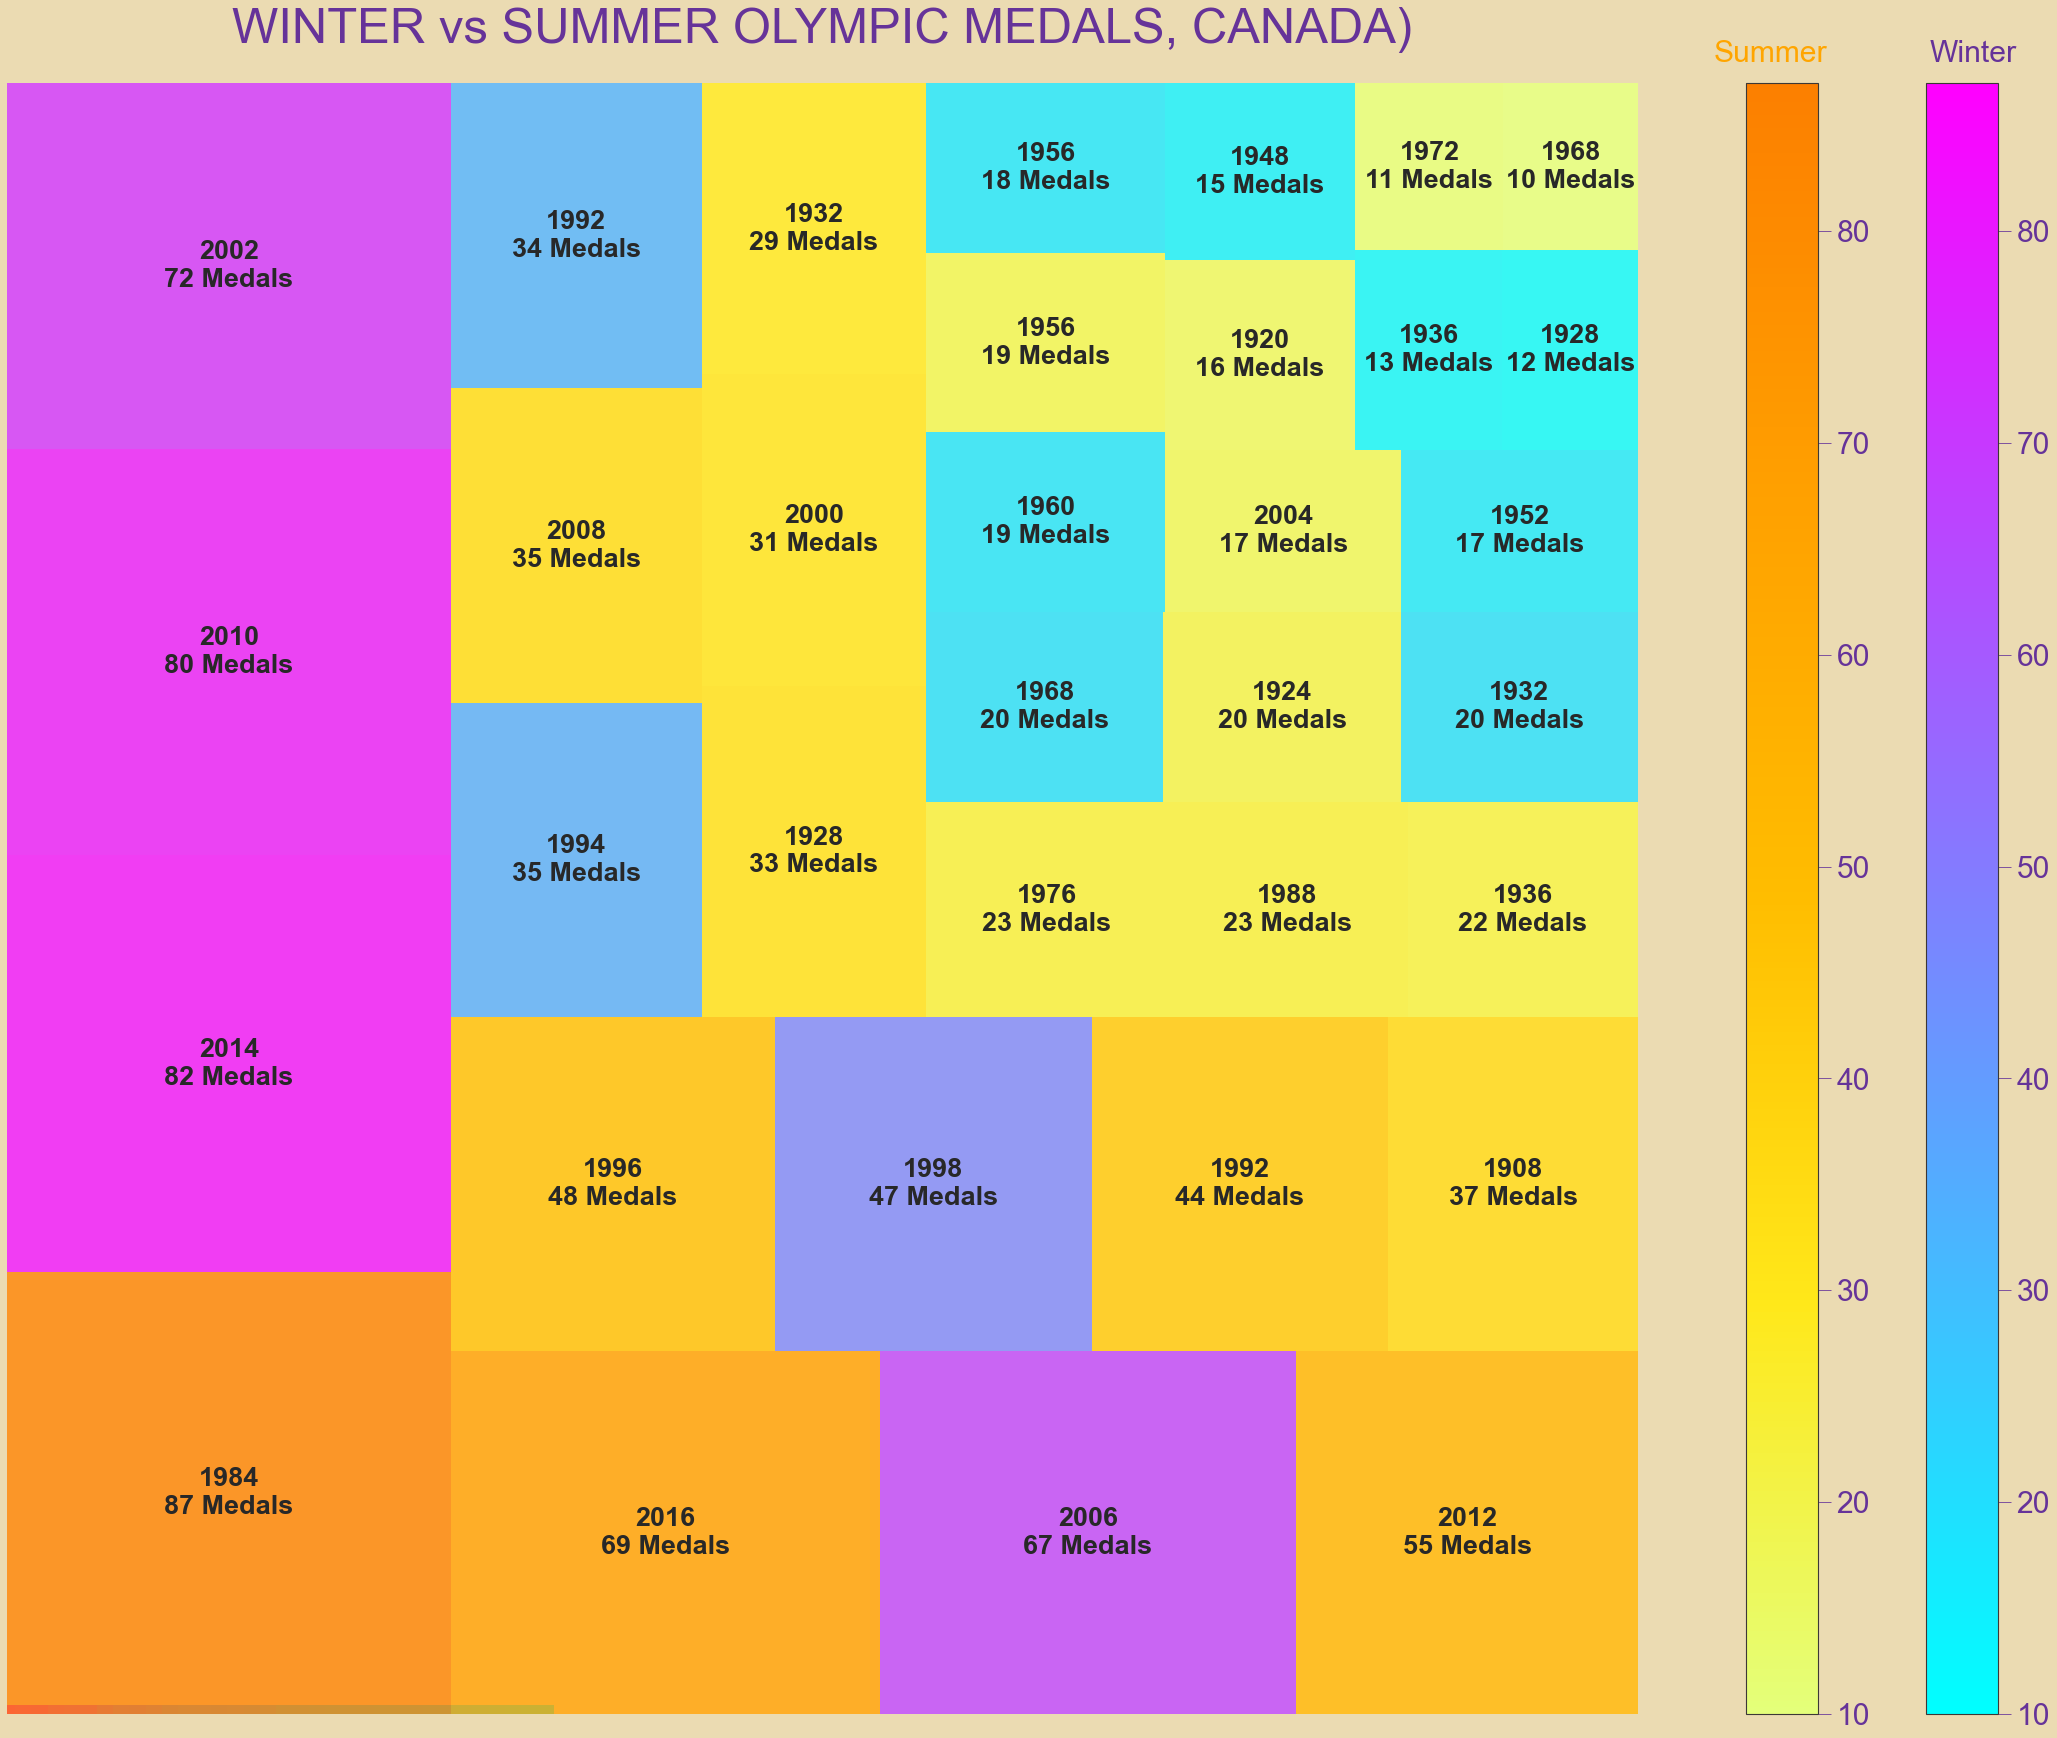

In [138]:
cmap_summer = cmp.get_cmap('Wistia')
cmap_winter = cmp.get_cmap('cool')
min_count = min(canada_medal_count['Medal'])
max_count = max(canada_medal_count['Medal'])
norm = cl.Normalize(vmin=min_count, vmax=max_count)
colors = [cmap_winter(norm(value)) if (pd.Series(canada_medal_count[canada_medal_count.index.get_level_values(0) == cnt].index.get_level_values(1)).str.contains("Winter") == True).any() else cmap_summer(norm(value)) for cnt, value in enumerate(canada_medal_count['Medal'])]
labels = ["%s\n%s Medals" % (label) for label in zip(canada_medal_count['Year'], canada_medal_count['Medal'])]

fig = plt.figure(figsize=(50, 30))
ax = fig.add_subplot(111, aspect='auto')
ax = squarify.plot(canada_medal_count['Medal'], color=colors, label=labels, alpha=.8, text_kwargs={'fontsize':27, 'fontweight': 'bold'})
ax.set_title("Winter vs Summer Olympic medals, Canada")
plt.title("WINTER vs SUMMER OLYMPIC MEDALS, CANADA)", 
          fontsize=49, 
          color= 'rebeccapurple', 
          pad=40,
          loc="center")
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', colors="rebeccapurple", size=13)
ax.tick_params(axis='y', colors="rebeccapurple", size=13)

img = plt.imshow(medal_count_arr, cmap=cmap_summer)

img_w = plt.imshow(medal_count_arr, cmap=cmap_winter)
img.set_visible(True)
img_w.set_visible(True)
cax = fig.add_axes([ax.get_position().x1+0.03, ax.get_position().y0, 0.02, ax.get_position().height])
cax_w = fig.add_axes([ax.get_position().x1+0.08, ax.get_position().y0, 0.02, ax.get_position().height])
cax_w.tick_params(axis='y', colors="rebeccapurple", size=13, labelsize=30)
cax.tick_params(axis='y', colors="rebeccapurple", size=13, labelsize=30)

fig.colorbar(img, orientation="vertical", shrink=.96, cax=cax)
fig.colorbar(img_w, orientation="vertical", shrink=.96, cax=cax_w)
fig.text(.76, .89, "Summer", fontsize=30, color="orange")
fig.text(.82, .89, "Winter", fontsize=30, color="rebeccapurple")
# plt.savefig("treemap_canada.png")

plt.show()